## Dilation to resample binary volume  

In [1]:
from porespy import generators
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis as NA
import time
import tensorflow as tf

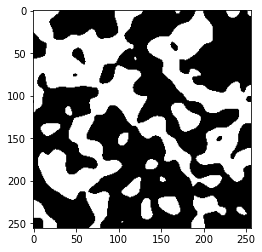

In [2]:
vol_shape = (256, 256, 256)
vol = generators.blobs(vol_shape)
plt.imshow(vol[vol.shape[0]//2,...], cmap = 'gray')

In [3]:
from cupyx.scipy.ndimage import generic_gradient_magnitude, sobel
import cupy as cp

In [4]:
vole = generic_gradient_magnitude(cp.array(vol),sobel).get()

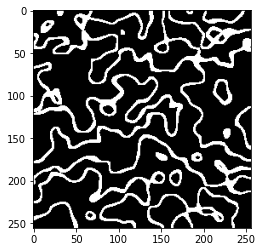

In [5]:
plt.imshow(vole.take(vole.shape[1]//2, 1), cmap = 'gray')

In [6]:
# sizes = [100,200,300]
# times = []
# for size in sizes:
#     vol = cp.zeros((size,size,size))
#     t0 = time.time()
#     vole = generic_gradient_magnitude(cp.array(vol),sobel).get()
#     t1 = time.time()
#     times.append(t1-t0)    

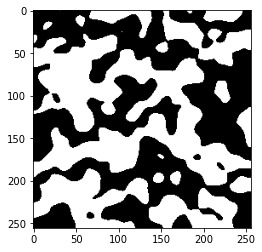

In [7]:
plt.imshow(vol.take(vol.shape[1]//2, 1), cmap = 'gray')

In [8]:
def _edge_map(Y):

    '''
    this algorithm was inspired by: https://github.com/tomochallenge/tomochallenge_utils/blob/master/foam_phantom_utils.py
    '''
    msk = np.zeros_like(Y)
    tmp = Y[:-1]!=Y[1:]
    msk[:-1][tmp] = 1
    msk[1:][tmp] = 1
    tmp = Y[:,:-1]!=Y[:,1:]
    msk[:,:-1][tmp] = 1
    msk[:,1:][tmp] = 1
    tmp = Y[:,:,:-1]!=Y[:,:,1:]
    msk[:,:,:-1][tmp] = 1
    msk[:,:,1:][tmp] = 1
    return msk > 0

In [9]:
vole = _edge_map(vol)

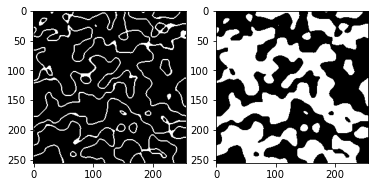

In [10]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(vole.take(vole.shape[1]//2, 1), cmap = 'gray')
ax[1].imshow(vol.take(vol.shape[1]//2, 1), cmap = 'gray')

In [11]:
sizes = [1000,1500,2000]
times = []
for size in sizes:
    vol = np.zeros((size,size,size))
    t0 = time.time()
    vole = _edge_map(vol)
    t1 = time.time()
    times.append(t1-t0)    

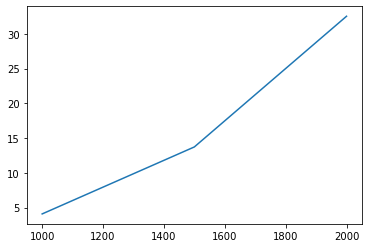

In [12]:
plt.plot(sizes, times)